## Prerequisties

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#!pip install warp_rnnt
#!pip install torchaudio==0.6.0
#!pip install hydra-core --upgrade

################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
'''! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!which conda  # should return /usr/local/bin/conda
!conda --version'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=31b2480bb8ef4686ed2f343aac0fba9c3c65c9f38bd0afdf6f8d5922ac4e832c
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


"! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh\n! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh\n! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local\nimport sys\nsys.path.append('/usr/local/lib/python3.7/site-packages/')\n!which conda  # should return /usr/local/bin/conda\n!conda --version"

In [ ]:
pwd

'/content'

In [ ]:
!pip install -r /content/drive/MyDrive/kospeech/dataset/kspon/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661762 sha256=1d8d6e19ec3f23aa343491eeba52810e5a84fbc72c43b8a18088d5b01c918fbf
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp


## Deep Speech2를 이용한 Ko-SPEECH 학습

### 학습 준비
- 전처리 및 단어 사전 준비
- 전사 자료의 벡터화
-> 결론적으로 학습을 위해서 transscript.txt(대본같은 역할)를 생성해야함

필요한 데이터는 크게 음성 데이터(wav, pcm 등)와 해당 음성 파일의 전사 데이터가 필요

In [ ]:
# 압축해제
#!unzip -qq "/content/drive/MyDrive/한국어_방언_발화(경상도)/Training/[라벨]경상도_학습데이터_1.zip" -d "/content/drive/MyDrive/한국어_방언_발화(경상도)/unzip"

!unzip -qq "/content/drive/MyDrive/kospeechdata/KsponSpeechall/KsponSpeech_01.zip"

In [ ]:
import re

def rule(x):
    # 괄호
    a = re.compile(r'\([^)]*\)')
    # 문장 부호
    b = re.compile('[^가-힣 ]')
    x = re.sub(pattern=a, repl='', string= x)
    x = re.sub(pattern=b, repl='', string= x)
    return x

# 예제 문장
x = "&company-name2&요거."

# 처리 결과 출력
result = rule(x)
print(result)

요거


## Preprocessing!

In [ ]:
# 데이터 갯수(큰 폴더 개수) 구하는 코드
import os

def count_subfolders(directory):
    if not os.path.isdir(directory):
        return "Invalid directory path"

    subfolders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    return len(subfolders)

# Example usage:
directory_path = '/content/drive/MyDrive/DKSR__data_share/Training/train_extracted'
print("Number of subfolders:", count_subfolders(directory_path))

Number of subfolders: 1018


In [ ]:
#데이터 개수 구하는 코드
def count_lines_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        return len(lines)

file_path = '/content/drive/MyDrive/kospeech/test/transcripts.txt'  # 여기에 파일 경로를 입력하세요.
line_count = count_lines_in_file(file_path)
print(f"The file has {line_count} lines.")

The file has 262106 lines.


## 잠깐 보류

In [ ]:
# permission denied 뜨는 거 없애기

!chmod +x /content/drive/MyDrive/kospeech/dataset/kspon/preprocess.sh

In [ ]:
# 초기에 한번 실행했으면 이제 안돌려도 됨
! /content/drive/MyDrive/kospeech/dataset/kspon/preprocess.sh

Pre-process Our Dataset..
Dataset Path : /content/drive/MyDrive/validation_made
Vocab Destination : /content/drive/MyDrive/kospeech/dataset
Save Path : ./data
Output-Unit : character
Preprocess Mode : phonetic
preprocess started..
/content/drive/MyDrive/validation_made/DKSR20002370/DKSR20002370_1_1_120.txt
Traceback (most recent call last):
  File "/content/drive/MyDrive/kospeech/dataset/kspon/main.py", line 80, in <module>
    main()
  File "/content/drive/MyDrive/kospeech/dataset/kspon/main.py", line 62, in main
    audio_paths, transcripts = preprocess(opt.dataset_path, opt.preprocess_mode)
  File "/content/drive/MyDrive/kospeech/dataset/kspon/preprocess/preprocess.py", line 112, in preprocess
    for jdx, file in enumerate(os.listdir(path)):
NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/validation_made/DKSR20002370/DKSR20002370_1_1_120.txt'


3시간 30분 넘게 걸림....

## Training(학습)

In [ ]:
#하하하하하하하22

In [ ]:
!pip install hydra-core --upgrade
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.1 MB/s eta 0:00:00


In [ ]:
!python /content/drive/MyDrive/kospeech/bin/main.py model=ds2 train=ds2_train train.dataset_path="/content/drive/MyDrive/DKSR__data_share/Training"

## Inference

In [ ]:
# outputs경로를 옮기는 코드
#!cp -rf outputs '/content/drive/MyDrive/'
#trainer.train(resume_from_checkpoint="/content/drive/MyDrive/Colab Notebooks/outputs/checkpoint-1970")

In [ ]:
!pip install omegaconf

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:



!python3 /content/drive/MyDrive/kospeech/bin/inference.py --model_path '/content/drive/MyDrive/kspon_checkpoint_models/outputs/2024_04_01/06-59-01/model.pt' --audio_path '/content/drive/MyDrive/DKSR__data_share/Training/train_extracted/DKSR20002401/DKSR20002401_1_1_2.wav' --device "cpu"

#Output :음성인식 결과 문장이 나옵니다

그쎄 어렸을 때는진 짜렸을 때는 진짜 택도 없는 꿈들이 많다이가뭐눈에 모이면 다하고 싶고 이것도보고 싶고 저것도 하고 싶고 막


## WER(Word Error Rate) 측정

In [ ]:
import Levenshtein as Lev

def wer(ref, hyp ,debug=False):
    r = ref.split()
    h = hyp.split()
    #costs will holds the costs, like in the Levenshtein distance algorithm
    costs = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
    # backtrace will hold the operations we've done.
    # so we could later backtrace, like the WER algorithm requires us to.
    backtrace = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]

    OP_OK = 0
    OP_SUB = 1
    OP_INS = 2
    OP_DEL = 3

    DEL_PENALTY=1 # Tact
    INS_PENALTY=1 # Tact
    SUB_PENALTY=1 # Tact
    # First column represents the case where we achieve zero
    # hypothesis words by deleting all reference words.
    for i in range(1, len(r)+1):
        costs[i][0] = DEL_PENALTY*i
        backtrace[i][0] = OP_DEL

    # First row represents the case where we achieve the hypothesis
    # by inserting all hypothesis words into a zero-length reference.
    for j in range(1, len(h) + 1):
        costs[0][j] = INS_PENALTY * j
        backtrace[0][j] = OP_INS

    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                costs[i][j] = costs[i-1][j-1]
                backtrace[i][j] = OP_OK
            else:
                substitutionCost = costs[i-1][j-1] + SUB_PENALTY # penalty is always 1
                insertionCost    = costs[i][j-1] + INS_PENALTY   # penalty is always 1
                deletionCost     = costs[i-1][j] + DEL_PENALTY   # penalty is always 1

                costs[i][j] = min(substitutionCost, insertionCost, deletionCost)
                if costs[i][j] == substitutionCost:
                    backtrace[i][j] = OP_SUB
                elif costs[i][j] == insertionCost:
                    backtrace[i][j] = OP_INS
                else:
                    backtrace[i][j] = OP_DEL

    # back trace though the best route:
    i = len(r)
    j = len(h)
    numSub = 0
    numDel = 0
    numIns = 0
    numCor = 0
    if debug:
        print("OP\tREF\tHYP")
        lines = []
    while i > 0 or j > 0:
        if backtrace[i][j] == OP_OK:
            numCor += 1
            i-=1
            j-=1
            if debug:
                lines.append("OK\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_SUB:
            numSub +=1
            i-=1
            j-=1
            if debug:
                lines.append("SUB\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_INS:
            numIns += 1
            j-=1
            if debug:
                lines.append("INS\t" + "****" + "\t" + h[j])
        elif backtrace[i][j] == OP_DEL:
            numDel += 1
            i-=1
            if debug:
                lines.append("DEL\t" + r[i]+"\t"+"****")
    if debug:
        lines = reversed(lines)
        for line in lines:
            print(line)
        print("Ncor " + str(numCor))
        print("Nsub " + str(numSub))
        print("Ndel " + str(numDel))
        print("Nins " + str(numIns))
    return numCor, numSub, numDel, numIns, (numSub + numDel + numIns) / (float) (len(r))


def cer(ref, hyp):
    ref = ref.replace(' ', '')
    hyp = hyp.replace(' ', '')
    dist = Lev.distance(hyp, ref)
    length = len(ref)
    return dist, length, dist/length

In [ ]:
import os
import glob
import shutil

# 원본 상위 폴더와 목적지 폴더 경로를 설정합니다.
source_parent_folder = '/content/drive/MyDrive/DKSR__data_share/Val/ValDataset'  # 원본 상위 폴더의 정확한 경로로 변경하세요.
destination_parent_folder = '/content/drive/MyDrive/DKSR__data_share/Val/ValDataset(only_wav_for_eval)'  # 목적지 상위 폴더의 정확한 경로로 변경하세요.

# 원본 상위 폴더의 모든 하위 폴더들을 순회합니다.
for subdir, dirs, files in os.walk(source_parent_folder):
    # 폴더명을 얻습니다 (예: DKSR20000890)
    folder_name = os.path.basename(subdir)

    # 이 폴더 내의 모든 .wav 파일을 순회합니다.
    for file in files:
        if file.endswith('.wav'):
            # 원본 파일의 전체 경로를 구합니다.
            source_file_path = os.path.join(subdir, file)

            # 목적지 하위 폴더를 생성합니다.
            destination_subdir = os.path.join(destination_parent_folder, folder_name)
            os.makedirs(destination_subdir, exist_ok=True)

            # 파일을 해당 폴더로 복사합니다.
            shutil.copy(source_file_path, os.path.join(destination_subdir, file))


In [ ]:
import os
import shutil

import os
import shutil

def move_files_to_parent_directory(parent_directory):
    for root, subdirs, files in os.walk(parent_directory):
        # 파일들을 상위 디렉토리로 이동
        for file in files:
            shutil.move(os.path.join(root, file), parent_directory)
        # 현재 루트가 상위 디렉토리가 아니면 빈 폴더 삭제
        if root != parent_directory:
            os.rmdir(root)

# 주의: 이 코드는 모든 하위 폴더와 파일을 상위 디렉토리로 이동시키고, 원래의 폴더들은 삭제합니다.
# 실제로 사용하기 전에 백업을 하시는 것이 좋습니다.

# 여기에 실제 상위 폴더 경로를 입력하세요.
parent_directory = '/content/drive/MyDrive/DKSR__data_share/Val/ValDataset(only_wav_for_eval)'
move_files_to_parent_directory(parent_directory)

In [ ]:


!python3 /content/drive/MyDrive/kospeech/bin/inference_wer.py --model_path '/content/drive/MyDrive/kspon_checkpoint_models/outputs/2024_04_01/06-59-01/model.pt' --audio_path '/content/drive/MyDrive/DKSR__data_share/Val/ValDataset(only_wav_for_eval)' --transcript_path '/content/drive/MyDrive/Evaluation/transcripts.txt' --device "cpu"




6903 files test starts...
CER/WER caculation: True
-> transcript: /content/drive/MyDrive/Evaluation/transcripts.txt
Output destination: /content/drive/MyDrive/Evaluation
342it [08:32,  1.50s/it]
Traceback (most recent call last):
  File "/content/drive/MyDrive/kospeech/bin/inference_wer.py", line 115, in <module>
    numCor, numSub, numDel, numIns, WER = wer(transcript[i], revise(sentence))
  File "/content/drive/MyDrive/kospeech/bin/tools.py", line 92, in wer
    return numCor, numSub, numDel, numIns, (numSub + numDel + numIns) / (float) (len(r))
ZeroDivisionError: float division by zero


## Checkpoints
Checkpoints are organized by experiments and timestamps as shown in the following file structure.

#### outputs
##### +-- YYYY_mm_dd
##### |  +-- HH_MM_SS
#####   |  +-- trainer_states.pt
#####   |  +-- model.pt
You can resume and load from checkpoints.

# KO_BART

In [3]:
model_path= '/content/drive/MyDrive/saved_model'

model_name = "gogamza/kobart-base-v2"

from transformers import pipeline

nlp_pipeline=pipeline('text2text-generation',model=model_path,tokenizer=model_name)

def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    return [x['generated_text'] for x in out]


print("Write 'q' to exit")
while True:
    src_text=input("Dialect to translate(입력받을 사투리) : ")
    if src_text == 'q':
        break
    target_text_ko=generate_text(nlp_pipeline,src_text,num_return_sequences=1,max_length=64)[0]
    print(f"Translated Standard (표준어로 출력): {target_text_ko}")

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


tokenizer.json:   0%|          | 0.00/682k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Write 'q' to exit
Dialect to translate(입력받을 사투리) : 내 좋아했나? 그라믄 그때 와 그란건데?
Translated Standard (표준어로 출력): 나 좋아했나? 그러면 그때 왜 그런건데?


KeyboardInterrupt: Interrupted by user

# 최종 연결!!(Ko-Speech & Ko-BART& Tensorflow-TTS)

## Ko=BART 불러오기

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from transformers import pipeline

model_path= '/content/drive/MyDrive/saved_model'
model_name = "gogamza/kobart-base-v2"


nlp_pipeline = pipeline('text2text-generation',model=model_path,tokenizer=model_name)


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


### TensorflowTTS(Fast-Speech2) 불러오기

In [4]:
'''!pip install h5py==2.10
!pip install git+https://github.com/repodiac/german_transliterate

print("Downloading FastSpeech2 model...")
!gdown --id {"1adb_hA9q0Qg959bl70WiRpm5a9Hdc2Ym"} -O fastspeech2-200k.h5

'''

import tensorflow as tf
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

os.chdir("/content/drive/MyDrive/TensorFlowTTS")
!pip install .
os.chdir("..")

import sys
sys.path.append("/content/drive/MyDrive/TensorFlowTTS/")

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

fastspeech2_config = AutoConfig.from_pretrained('/content/drive/MyDrive/TensorFlowTTS/examples/fastspeech2/conf/fastspeech2.kss.v1.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="fastspeech2-200k.h5",
    name="fastspeech2"
)

# Vocoder model (mel spectrogram -> audio)
# 멜로디 생성 모델을 사용합니다.
mb_melgan_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="mb.melgan-1000k.h5",
    name="mb_melgan"
)
 # input text를 inference시 숫자로 이뤄진 sequence로 변환할 때 필요합니다.
processor = AutoProcessor.from_pretrained(pretrained_path="./kss_mapper.json")

# 직접 음성합성을 진행하는 함수입니다.
# text -> mel spectrogram model, vocoder model을 인자로 선택합니다.
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.2], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  # tacotron2면 attention graph도 함께 반환합니다.
  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()
# attention을 시각화해서 보여주는 함수입니다.
# tacotron2의 encoder와 decoder가 어떠한 mapping을 형성하는지 보여줍니다.
def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Encoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Decoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()


def visualize_mel(alignment_history) :
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()



Processing /content/drive/MyDrive/TensorFlowTTS
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


## Whisper

In [ ]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

Ko-Speech Result (음성 인식) :  shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory', 'Intel MKL FATAL ERROR: Cannot load /usr/local/lib/python3.10/dist-packages/torch/lib/libtorch_cpu.so.
Translated Standard Result (표준어체로 출력): 사실 상대에 얼마나 친절하고 날 좋아해지냐 그게 또 중요해가지고
최종 출력 표준어 발화 : 


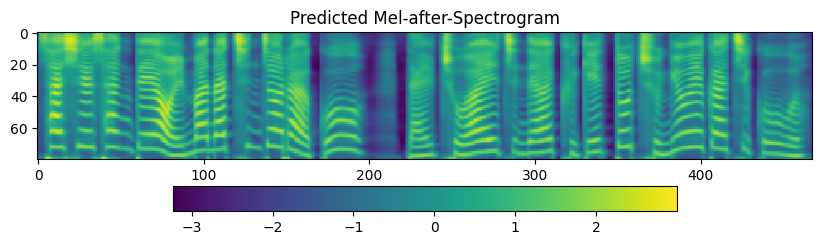

In [ ]:
# 파이프라인 연결 (Ko-Speech ver)
import time
start_time  = time.time()
def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    return [x['generated_text'] for x in out]

src_text = !python3 /content/drive/MyDrive/kospeech/bin/inference.py --model_path '/content/drive/MyDrive/kospeechdata/models/30000/model.pt' --audio_path '/content/drive/MyDrive/validation_made/DKSR20002370/DKSR20002370_1_1_1.wav' --device "cpu"
src_text = str(src_text)[2:-2]
print("Ko-Speech Result (음성 인식) : ", src_text)

target_text_ko = generate_text(nlp_pipeline,'사실 상대에 얼마나 친절하고 날 좋아해지냐 그게 또 중요해가지고',num_return_sequences=1,max_length=64)[0]
print(f"Translated Standard Result (표준어체로 출력): {target_text_ko}")

mels, audios = do_synthesis(target_text_ko, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
print("최종 출력 표준어 발화 : ")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

최종 출력 표준어 발화 : 


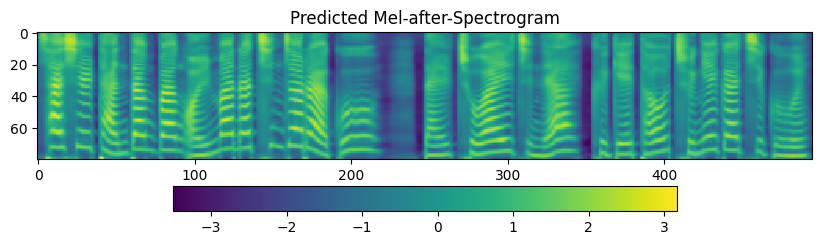

In [7]:
mels, audios = do_synthesis('사실 단담방 얼마나 친절하고 날 좋아해지냐 그게 더 중해가지구', fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
print("최종 출력 표준어 발화 : ")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
def rule(x):
    # 괄호
    a = re.compile(r'\([^)]*\)')
    # 문장 부호
    b = re.compile('[^가-힣 ]')
    x = re.sub(pattern=a, repl='', string= x)
    x = re.sub(pattern=b, repl='', string= x)
    return x

## Whisper 사용 ver(...ㅠ)

In [ ]:
# 파이프라인 연결
import re
start_time  = time.time()

def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    return [x['generated_text'] for x in out]

src_text = !whisper "/content/drive/MyDrive/DKSR__data_share/Training/train_extracted/DKSR20004081/DKSR20004081_1_1_12.wav" --model medium --language Korean
src_text = [re.sub(r'\[.*?\]\s*', '', text) for text in src_text]
src_text = rule(str(src_text))
print("Ko-Speech Result (음성 인식) : ", src_text)

target_text_ko = generate_text(nlg_pipeline,src_text,num_return_sequences=1,max_length=64)[0]
print(f"Translated Standard Result (표준어체로 출력): {target_text_ko}")

mels, audios = do_synthesis(target_text_ko, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
print("최종 출력 표준어 발화 : ")
visualize_mel_spectrogram(mels[0])
output_wav = ipd.Audio(audios, rate=22050)
output_wav

^C
Ko-Speech Result (음성 인식) :                                                                                                                                                                                                                                                 


NameError: name 'nlg_pipeline' is not defined